# Análise de dados de Churn sobre perfis de compra - Empresa de Telecomunicações

## Sumário
1. [Introdução](#Introdução)
2. [Importação de Dados](#Importação-de-Dados)
3. [Exploração Inicial de Dados](#Exploração-Inicial-de-Dados)
4. [Pré-processamento de Dados](#Pré-processamento-de-Dados)
5. [Conclusões](#conclusões)

## Introdução

Este projeto tem como objetivo fazer uma análise de dados sobre perfis de compra dos clientes de uma agência de telecomunicações, tirar conclusões sobre a possibilidade de churn, realizar descrições e testes estatísticos para apresentar insights à equipe de negócios, além de criar um modelo preditivo para classificar essa probabilidade a fim de otimizar a retenção de clientes.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

## Importação de Dados
Iremos importar os dados em formato .xlsx e coletar informações genéricas a fim de ter um melhor entendimento inicial do problema

In [3]:
# Load the data
customer_churn_data = pd.read_excel('../data/raw/customer-churn.xlsx')
customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,No
7039,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,No
7040,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,No
7041,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No


In [4]:
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
customer_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
customer_churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Exploração Inicial de Dados
Aqui iremos explorar e realizar algumas análises, como:
- Análise demográfica
- Análise de serviços prestados
- Análise de contrato e faturamento
- Análise Financeira
- Análise de Churn

### Análise demográfica

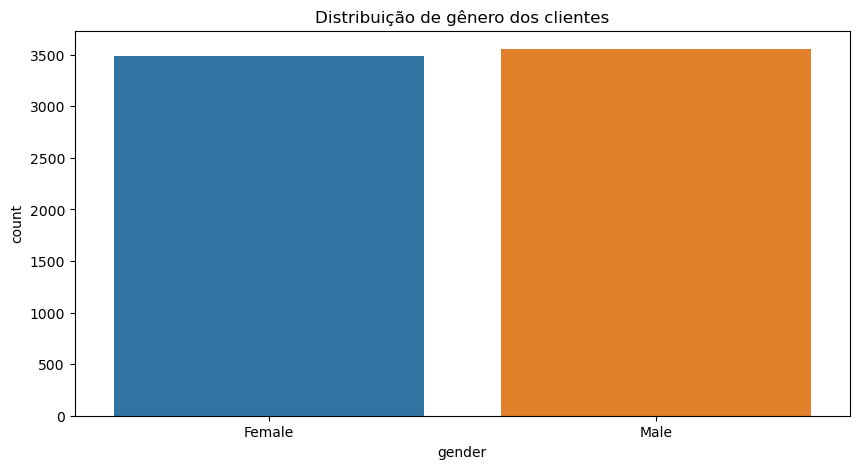

In [7]:

gender_counts = customer_churn_data['gender'].value_counts(normalize=True)
gender_counts

plt.figure(figsize=(10, 5))
sns.countplot(data=customer_churn_data, x='gender')
plt.title('Distribuição de gênero dos clientes')
plt.show()

SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64


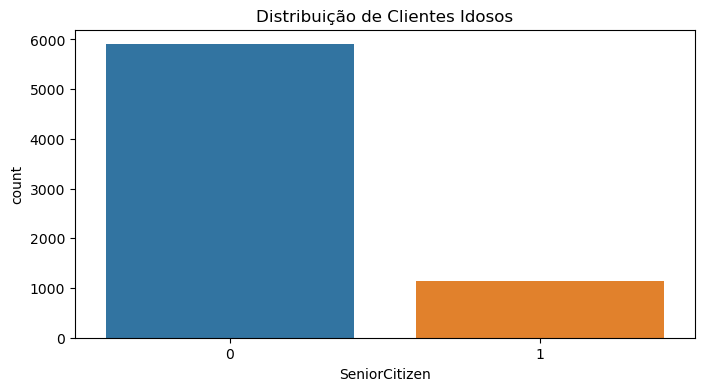

In [8]:
senior_counts = customer_churn_data['SeniorCitizen'].value_counts(normalize=True)
print(senior_counts)

# Visualizando a distribuição de idosos
plt.figure(figsize=(8, 4))
sns.countplot(x='SeniorCitizen', data=customer_churn_data)
plt.title('Distribuição de Clientes Idosos')
plt.show()

Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


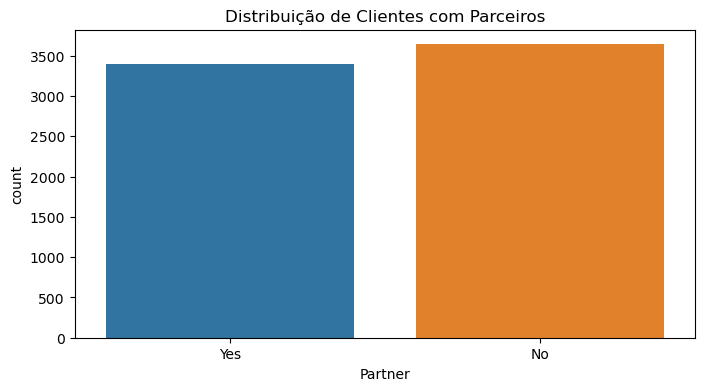

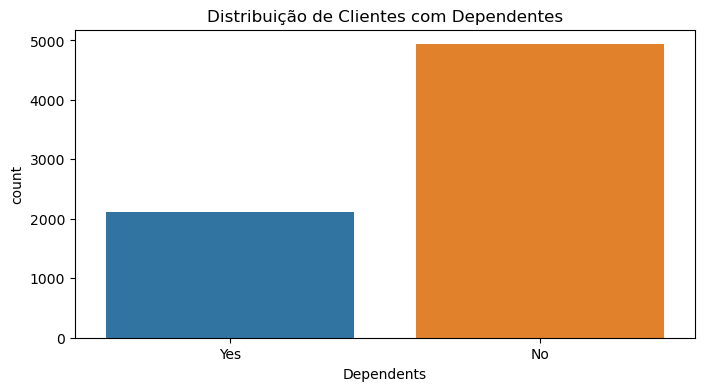

In [9]:
# A análise de parceiros e dependentes
partner_counts = customer_churn_data['Partner'].value_counts(normalize=True)
dependents_counts = customer_churn_data['Dependents'].value_counts(normalize=True)
print(partner_counts)
print(dependents_counts)

# Visualizando a distribuição de parceiros e dependentes
plt.figure(figsize=(8, 4))
sns.countplot(x='Partner', data=customer_churn_data)
plt.title('Distribuição de Clientes com Parceiros')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Dependents', data=customer_churn_data)
plt.title('Distribuição de Clientes com Dependentes')
plt.show()

#### Conclusões da análise demográfica

Até esse instante podemos encontrar conclusões bem diretas, como seniores sendo a minoria nos dados coletados, e também a disparidade entre as pessoas com dependentes de sem dependentes. Além disso, o público é bem balanceado entre os gêneros

### Para a análise de serviços, teremos que pré-processar a feature Churn, sendo:
- Não = 0
- Sim = 1

In [10]:
customer_churn_data['Churn'] = customer_churn_data['Churn'].map({'Yes': 1, 'No': 0})

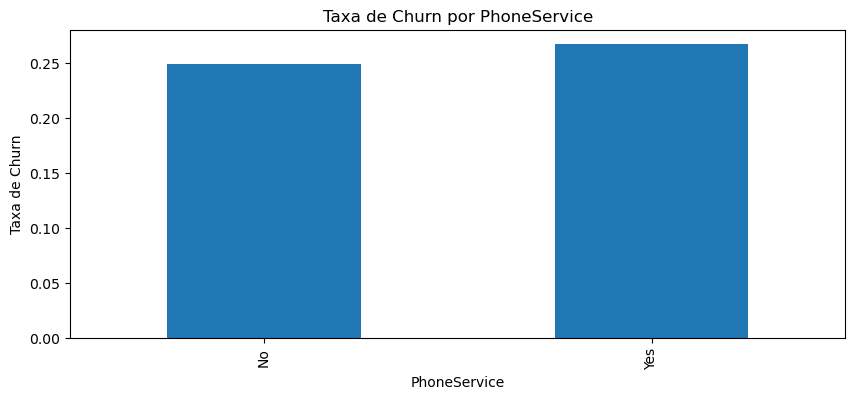

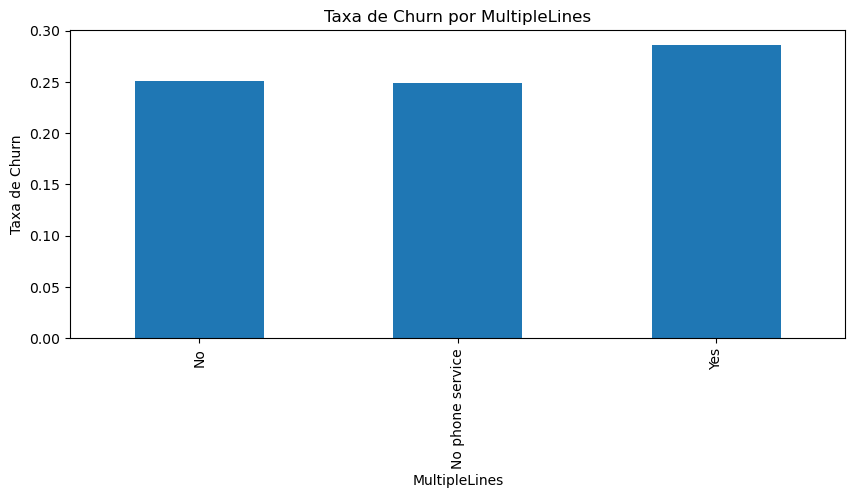

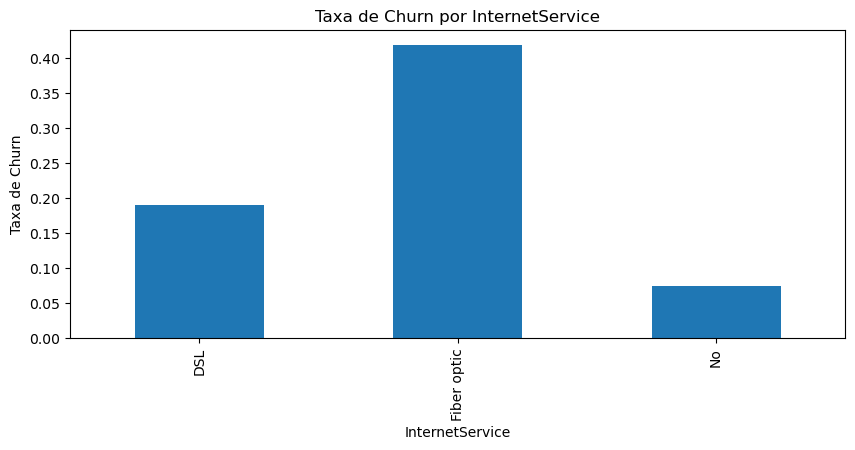

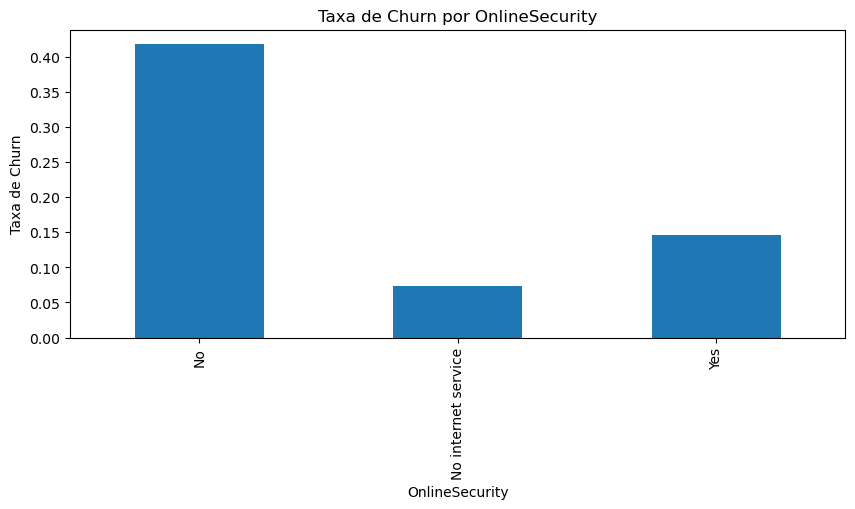

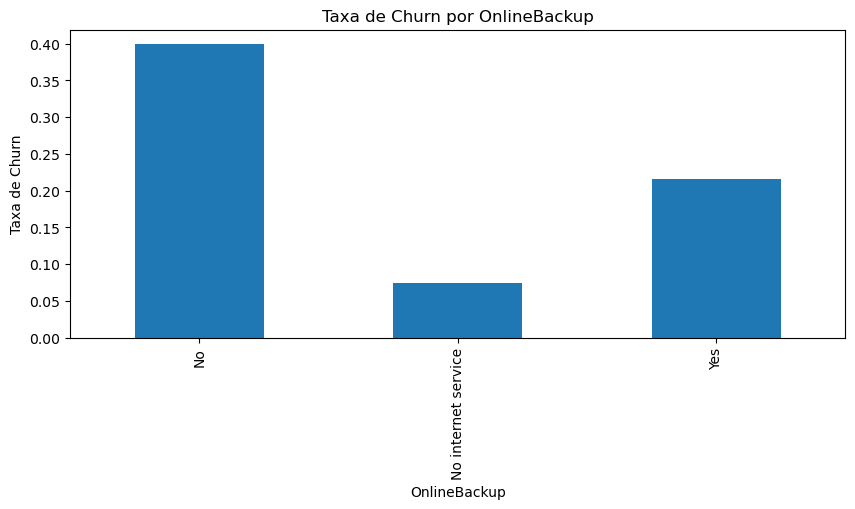

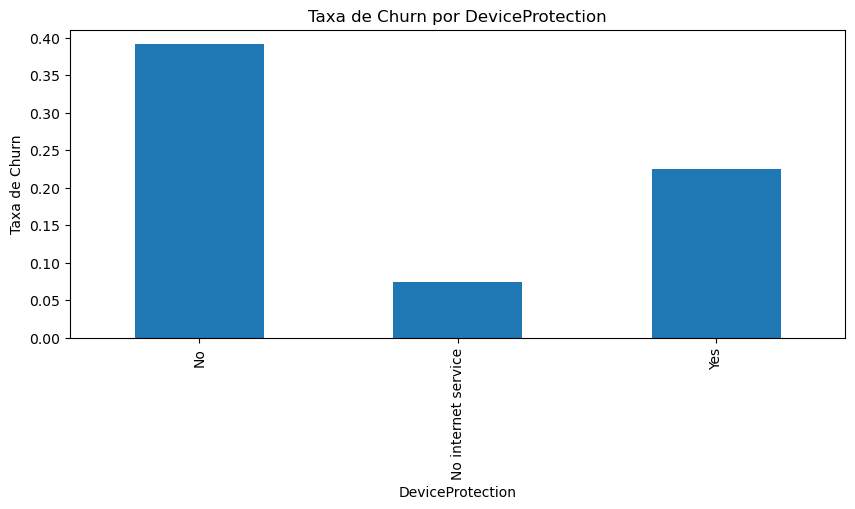

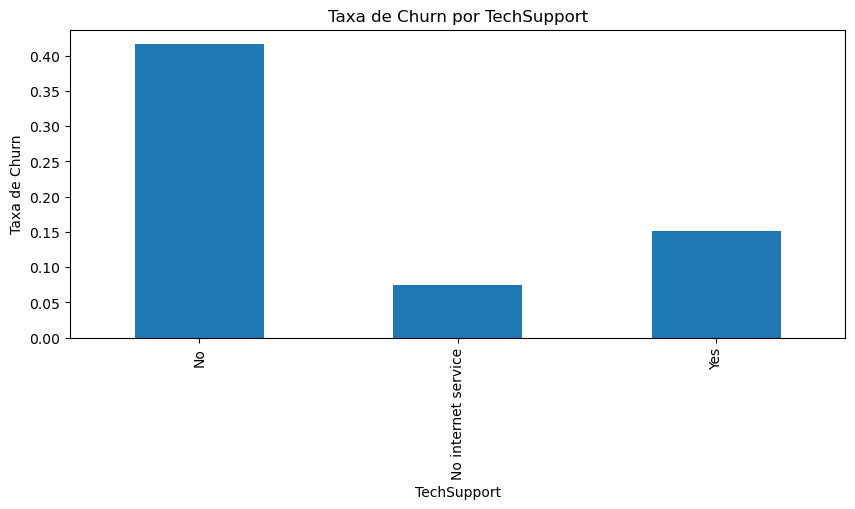

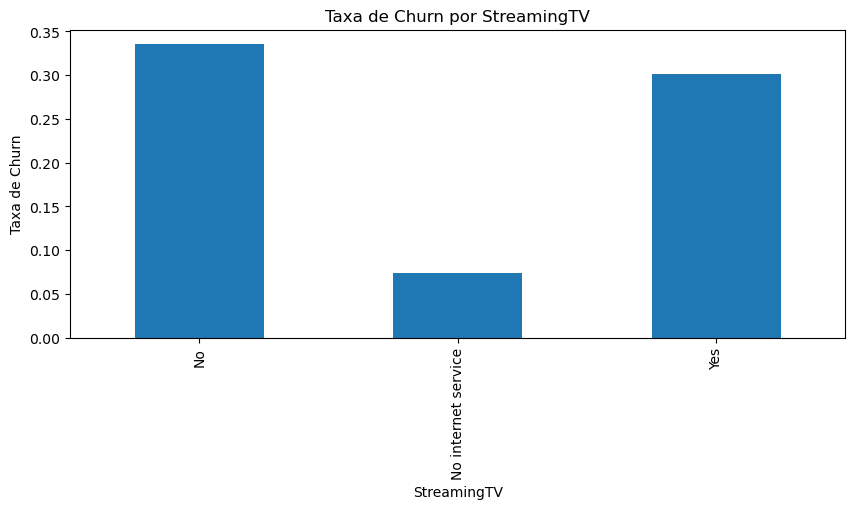

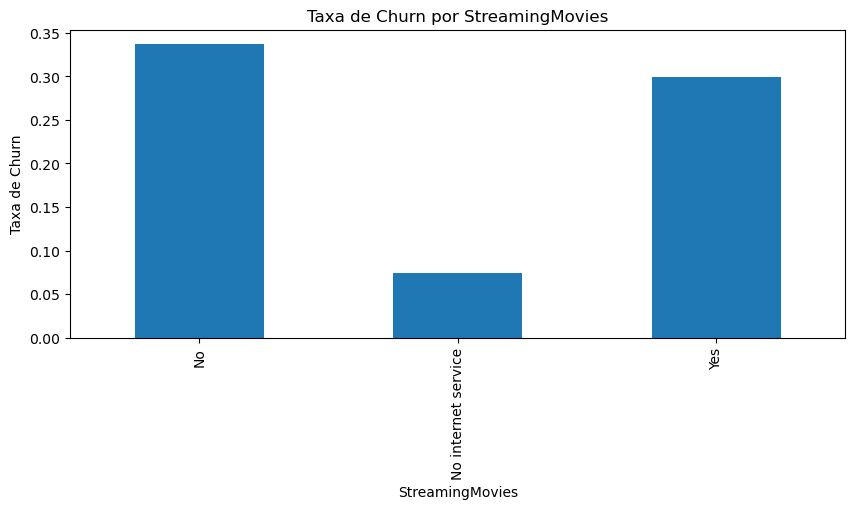

In [11]:
# Lista dos serviços para analisar
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Análise e Visualização da relação entre uso dos serviços e churn
for service in service_columns:
    # Calculando a taxa de churn para cada serviço
    churn_rate = customer_churn_data.groupby(service)['Churn'].mean()
    # Visualização da taxa de churn para cada serviço
    plt.figure(figsize=(10, 4))
    churn_rate.plot(kind='bar')
    plt.title(f'Taxa de Churn por {service}')
    plt.ylabel('Taxa de Churn')
    plt.show()

#### Conclusões da análise de serviços e a variável de churn

1. PhoneService: Não há uma diferença significativa na taxa de churn entre os clientes que têm o serviço de telefone e os que não têm.
   
2. MultipleLines: Clientes com múltiplas linhas parecem ter uma taxa de churn ligeiramente maior do que aqueles sem ou sem serviço de telefone.
   
3. InternetService: Há uma grande diferença na taxa de churn com base no tipo de serviço de internet. Clientes com fibra óptica têm uma taxa de churn significativamente maior do que aqueles com DSL ou sem serviço de internet.
   
4. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Clientes sem esses serviços têm taxas de churn mais altas em comparação com aqueles que os possuem. A falta de serviços de segurança e suporte parece estar fortemente associada a maiores taxas de churn.
   
5. StreamingTV e StreamingMovies: As taxas de churn para clientes com serviços de streaming são maiores do que para aqueles sem serviço, mas são comparáveis entre clientes com StreamingTV e StreamingMovies.

A partir desses dados, pode-se deduzir que serviços adicionais, especialmente aqueles relacionados à segurança e ao suporte, têm um impacto positivo na retenção de clientes. Por outro lado, clientes com serviço de fibra óptica, que pode ser mais caro ou menos confiável, dependendo do contexto, tendem a ter uma taxa de churn mais elevada.  

Essas informações podem ser utilizadas pela empresa para identificar áreas onde a melhoria dos serviços ou ofertas adicionais podem contribuir para a redução do churn. Por exemplo, pode-se considerar a melhoria do serviço de fibra óptica ou a promoção de pacotes com serviços de segurança para melhorar a retenção de clientes.

### Análise de contrato e faturamento
 Para a análise de contrato e faturamento, vamos focar em como o tipo de contrato e as opções de faturamento (como faturamento sem papel e método de pagamento) se relacionam com a taxa de churn.

O que foi feito:
- Cálculo da taxa de Churn para diferentes tipos de contrato
- Comparações entre o Paperless Billing e o Payment Method, baseadas em função do churn para essas variáveis.
- Conclusões sobre possíveis estratégias a fim de contornar o problema

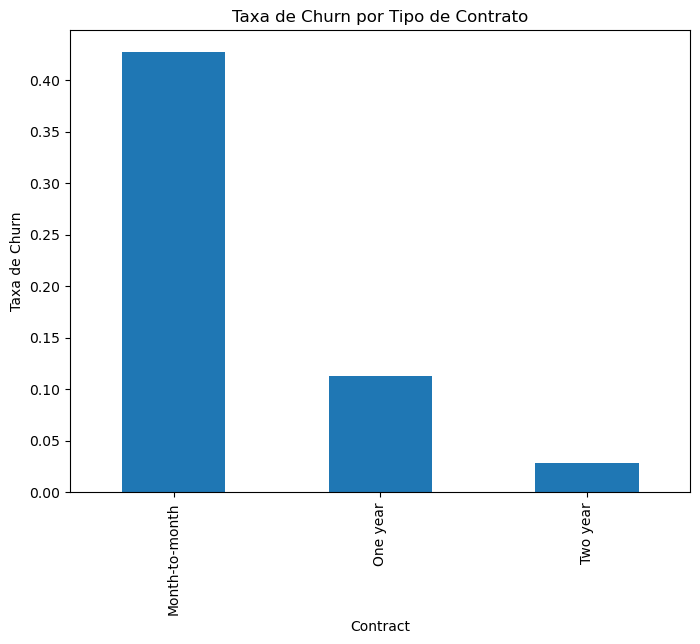

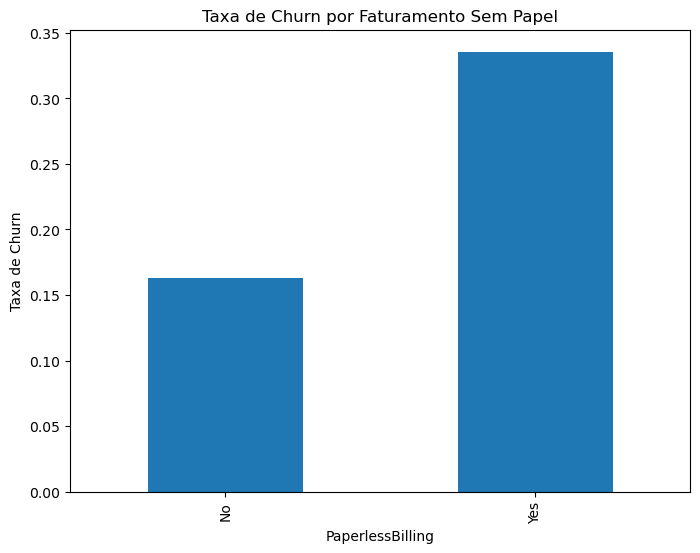

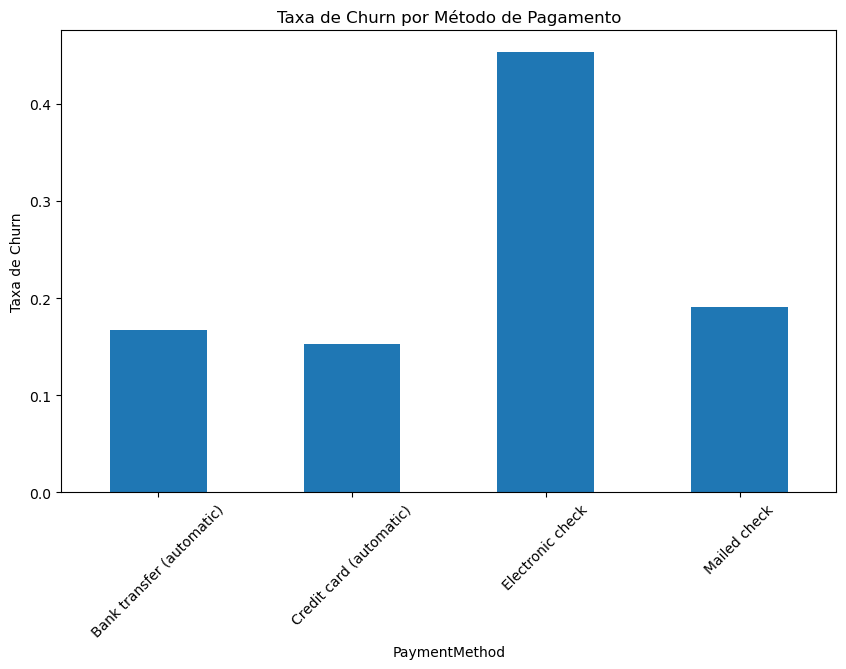

In [12]:
# Análise de Tipo de Contrato
contract_churn_rates = customer_churn_data.groupby('Contract')['Churn'].mean()

plt.figure(figsize=(8, 6))
contract_churn_rates.plot(kind='bar')
plt.title('Taxa de Churn por Tipo de Contrato')
plt.ylabel('Taxa de Churn')
plt.show()

# Análise de Faturamento Sem Papel (PaperlessBilling)
paperless_churn_rates = customer_churn_data.groupby('PaperlessBilling')['Churn'].mean()

plt.figure(figsize=(8, 6))
paperless_churn_rates.plot(kind='bar')
plt.title('Taxa de Churn por Faturamento Sem Papel')
plt.ylabel('Taxa de Churn')
plt.show()

# Análise de Método de Pagamento
payment_method_churn_rates = customer_churn_data.groupby('PaymentMethod')['Churn'].mean()

plt.figure(figsize=(10, 6))
payment_method_churn_rates.plot(kind='bar')
plt.title('Taxa de Churn por Método de Pagamento')
plt.ylabel('Taxa de Churn')
plt.xticks(rotation=45)
plt.show()


### Conclusões da Análise de contratos e faturamento

1. Tipo de Contrato: A taxa de churn é mais alta para clientes com contratos mensais (month-to-month) e diminui significativamente para contratos de um e dois anos. Isso sugere que clientes em contratos de longo prazo são mais propensos a permanecer com a empresa.


2. Faturamento Sem Papel (PaperlessBilling): A taxa de churn parece ser mais alta para clientes que adotam o faturamento sem papel. Isso pode ser surpreendente, já que o faturamento sem papel é frequentemente associado à conveniência. No entanto, isso pode indicar que clientes que são mais digitais e talvez mais propensos a comparar serviços estão mais atentos às alternativas disponíveis no mercado.

3. Método de Pagamento: Métodos de pagamento automáticos, como transferências bancárias e cartões de crédito, mostram uma taxa de churn menor em comparação com métodos manuais como cheques. No entanto, a taxa de churn para pagamento com cheque eletrônico é notavelmente mais alta. Isso pode sugerir problemas com este método específico ou um perfil de cliente diferente que prefere esse método.

Uma forma de abordar essas conclusões de maneira a gerar soluções para o negócio seria, por exemplo, incentivar clientes a se comprometerem com contratos mais longos ou oferecer promoções e benefícios para métodos de pagamento automáticos, visando diminuir a probabilidade de churn.

### Análise Financeira
Para seguirmos com a análise financeira, será necessário tratar os valores nulos referentes a coluna TotalCharges

Primeiro, analisaremos a distribuição dos dados para averiguar qual método de imputação seria mais adequado, como:
- Imputar pela média
- Imputar pela mediana

Ou até considerando outras opções como usar modelos de machine learning e comparar as medidas de tendência central antes e depois.

Também verificaremos a presença de outliers utilizando um boxplot e o método IQR.

/opt/homebrew/anaconda3/envs/data-science-standard/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


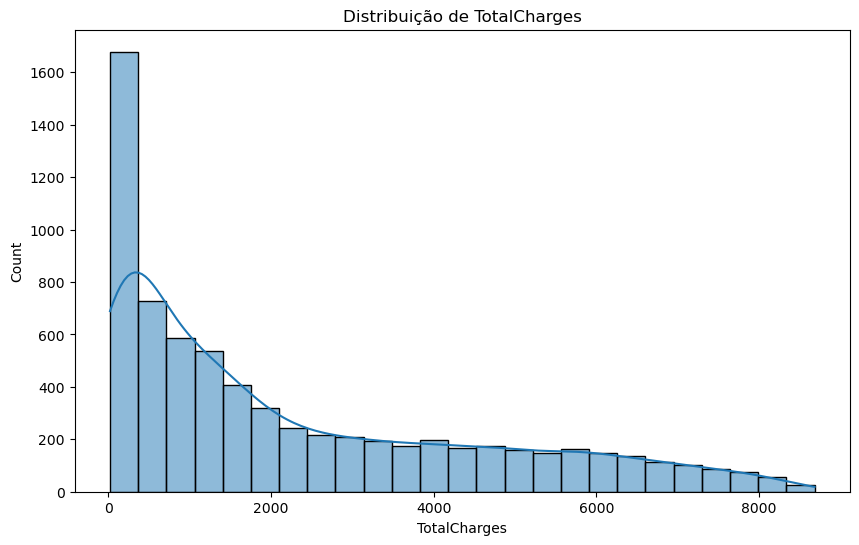

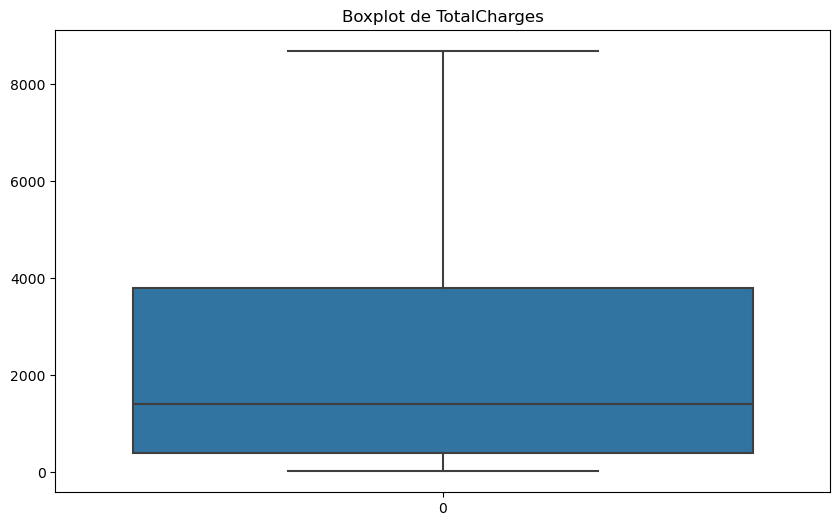

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


In [13]:
# Vamos visualizar a distribuição de TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(customer_churn_data['TotalCharges'].dropna(), kde=True)
plt.title('Distribuição de TotalCharges')
plt.show()

# Visualizando outliers com um boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(customer_churn_data['TotalCharges'].dropna())
plt.title('Boxplot de TotalCharges')
plt.show()

# Calculando estatísticas descritivas
total_charges_description = customer_churn_data['TotalCharges'].dropna().describe()
print(total_charges_description)

In [14]:
Q1 = customer_churn_data['TotalCharges'].quantile(0.25)
Q3 = customer_churn_data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = customer_churn_data[(customer_churn_data['TotalCharges'] < lower_bound) | (customer_churn_data['TotalCharges'] > upper_bound)]['TotalCharges']
outliers # sem outliers



Series([], Name: TotalCharges, dtype: float64)

#### Antes de decidirmos uma forma de imputação, é importante verificar se a ausência de valores se dá pelo fato de clientes terem um tempo entre 0-1 de meses (tenure), então eles não teriam sido cobrados ainda.

In [15]:
nan_total_charges = customer_churn_data[customer_churn_data['TotalCharges'].isna()]
tenure_stats = nan_total_charges['tenure'].describe()

print(tenure_stats)

count    11.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: tenure, dtype: float64


In [16]:
new_customers = customer_churn_data[(customer_churn_data['TotalCharges'].isna()) & (customer_churn_data['tenure'] <= 1)]
print(new_customers.shape[0])

11


#### Bingo!
Exatamente 11 valores ausentes

In [17]:
customer_churn_data.loc[customer_churn_data['TotalCharges'].isna(), 'TotalCharges'] = 0
print(customer_churn_data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


       MonthlyCharges  TotalCharges
count     7043.000000   7043.000000
mean        64.761692   2279.734304
std         30.090047   2266.794470
min         18.250000      0.000000
25%         35.500000    398.550000
50%         70.350000   1394.550000
75%         89.850000   3786.600000
max        118.750000   8684.800000


/opt/homebrew/anaconda3/envs/data-science-standard/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/data-science-standard/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


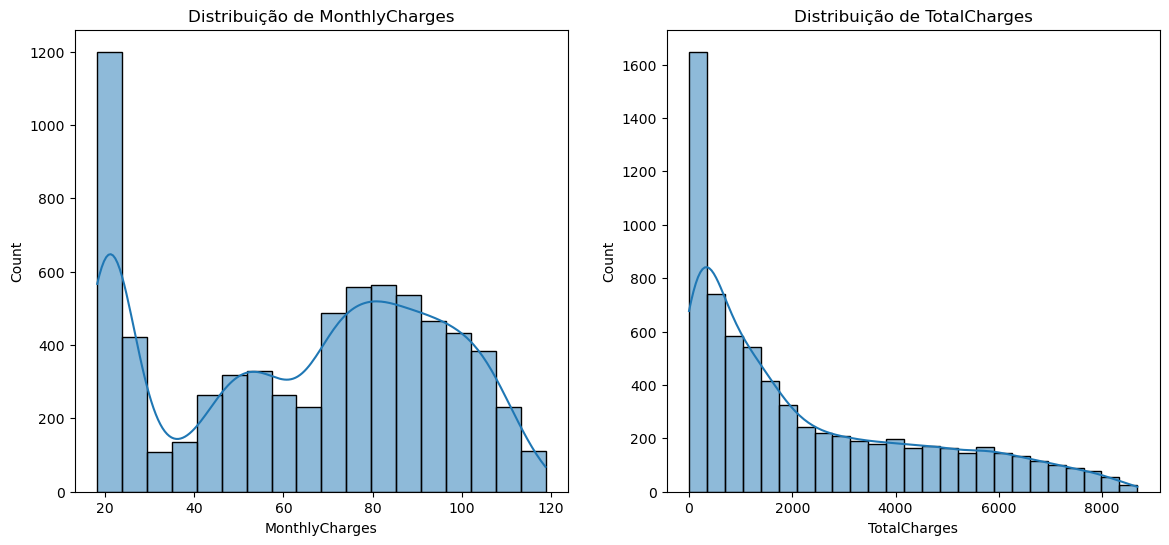

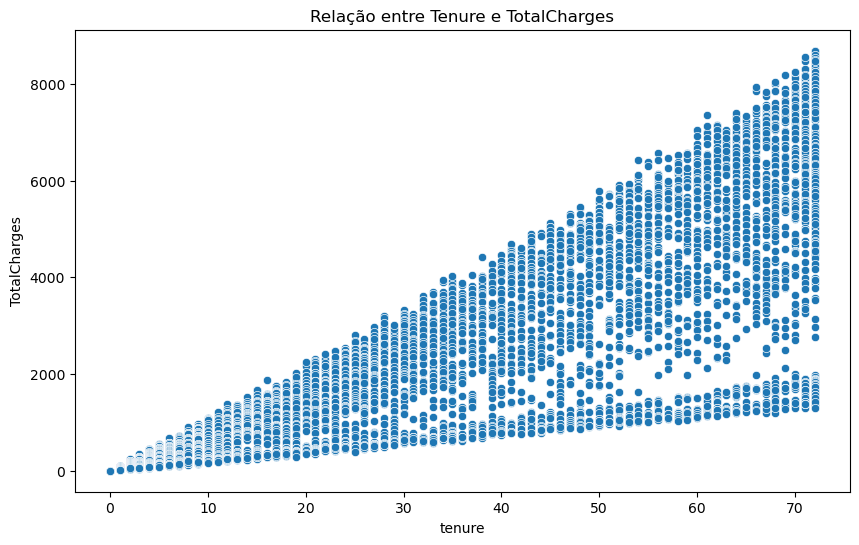

                tenure  TotalCharges
tenure        1.000000      0.826178
TotalCharges  0.826178      1.000000


In [18]:
# Sumário estatístico
print(customer_churn_data[['MonthlyCharges', 'TotalCharges']].describe())

# Histogramas de MonthlyCharges e TotalCharges
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(customer_churn_data['MonthlyCharges'], kde=True)
plt.title('Distribuição de MonthlyCharges')

plt.subplot(1, 2, 2)
sns.histplot(customer_churn_data['TotalCharges'], kde=True)
plt.title('Distribuição de TotalCharges')

plt.show()

# Gráfico de dispersão entre Tenure e TotalCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', data=customer_churn_data)
plt.title('Relação entre Tenure e TotalCharges')
plt.show()

# Correlação entre Tenure e TotalCharges
correlation = customer_churn_data[['tenure', 'TotalCharges']].corr()
print(correlation)

#### Conclusões da análise financeira
##### Análise de MonthlyCharges
- Os dados mostram uma variedade de cobranças mensais, com picos que indicam os pacotes de serviços preferidos.
- Taxas de churn mais altas são observadas entre clientes com maiores cobranças mensais.

##### Análise de TotalCharges
- A distribuição de TotalCharges é assimétrica à direita, indicando que clientes mais novos têm cobranças acumuladas menores.
- Clientes de longo prazo apresentam TotalCharges mais altos, consistente com maior tenure.

##### Relacionamento entre Tenure e TotalCharges
- Uma tendência positiva é observada entre tenure e TotalCharges no gráfico de dispersão.
- Uma forte correlação positiva (0,826) sugere que a lealdade do cliente leva a uma maior acumulação de receita.

##### Insights Estratégicos
- Potencial para redução de churn mediante revisão de estratégias de preços para cobranças mensais mais elevadas.
- Considerar incentivos de fidelidade para clientes com longa tenure para melhorar a retenção.


### Análise de Churn

Aqui focamos na correlação entre `tenure` e churn, para entender se clientes com mais tempo de serviço tendem a permanecer com a empresa, e também na relação entre custos (`MonthlyCharges` e `TotalCharges`) e churn.

Vale ressaltar que foi decidido usar a **MÉDIA** como taxa de churn por eu não ter achado uma forma clara de separar os períodos para o cálculo da taxa como em:

#### Fórmula Tradicional de Churn

A taxa de churn é calculada com a seguinte fórmula:


Taxa de Churn = $\left( \frac{\text{Número de Clientes que Cancelaram}}{\text{Número Total de Clientes no Início do Período} + \text{Número de Novos Clientes Durante o Período}} \right) \times 100$

- **Número de Clientes que Cancelaram**: Quantidade de clientes que cancelaram o serviço durante o período em questão.
- **Número Total de Clientes no Início do Período**: Total de clientes ativos no início do período de análise.
- **Número de Novos Clientes Durante o Período**: Clientes adquiridos durante o período de análise.

##### Uma forma de selecionar os períodos poderia ser utilizando os que tiverem tenure entre 0 e 1 como new_customers, mas ainda assim seria uma aproximação.


In [19]:
churn_rate = customer_churn_data['Churn'].mean()
print(f'Taxa Geral de Churn: {churn_rate:.2%}')

Taxa Geral de Churn: 26.54%


In [20]:
correlation = customer_churn_data[['tenure', 'Churn']].corr()
print(f'Correlação entre Tenure e Churn: {correlation.iloc[0,1]:.2f}')

Correlação entre Tenure e Churn: -0.35


##### Levando em conta que a distribuição dos custos não é normal, pode-se utilizar do Teste U de Mann-Whitney para comparar por meio do p-valor se essas variáveis influenciam o churn

In [21]:
churned = customer_churn_data[customer_churn_data['Churn'] == 1]
not_churned = customer_churn_data[customer_churn_data['Churn'] == 0]

u_statistic, p_value = mannwhitneyu(churned['MonthlyCharges'], not_churned['MonthlyCharges'])
print(f'MonthlyCharges - p-value do Teste U de Mann-Whitney: {p_value:.2e}')

u_statistic, p_value = mannwhitneyu(churned['TotalCharges'], not_churned['TotalCharges'])
print(f'TotalCharges - p-value do Teste U de Mann-Whitney: {p_value:.2e}')

MonthlyCharges - p-value do Teste U de Mann-Whitney: 3.31e-54
TotalCharges - p-value do Teste U de Mann-Whitney: 5.69e-83


 Os resultados do Teste U de Mann-Whitney mostram que há diferenças significativas nas cobranças mensais e totais entre clientes que cancelaram e os que não cancelaram. Os valores de p muito baixos indicam que essas diferenças não são devido ao acaso, sugerindo que os custos influenciam o churn.

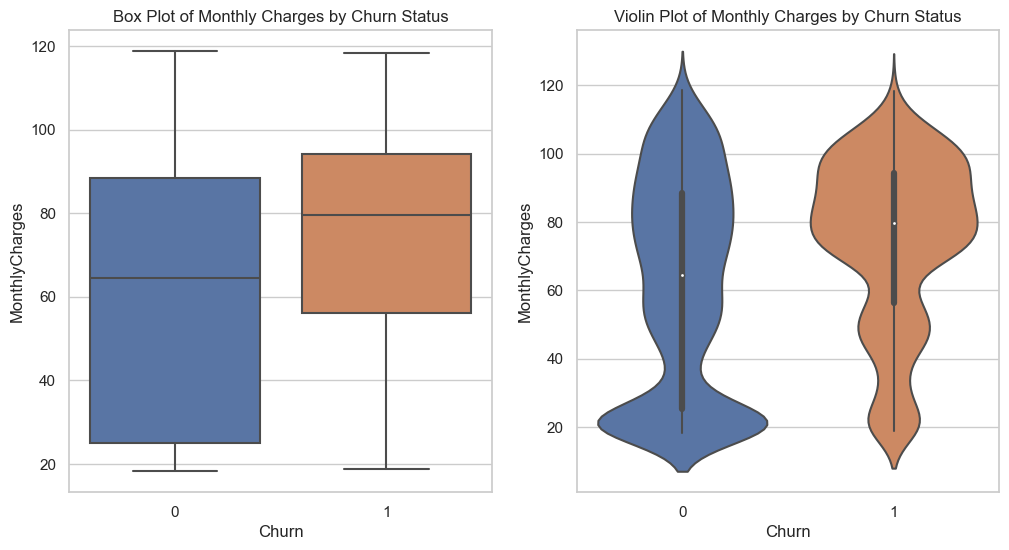

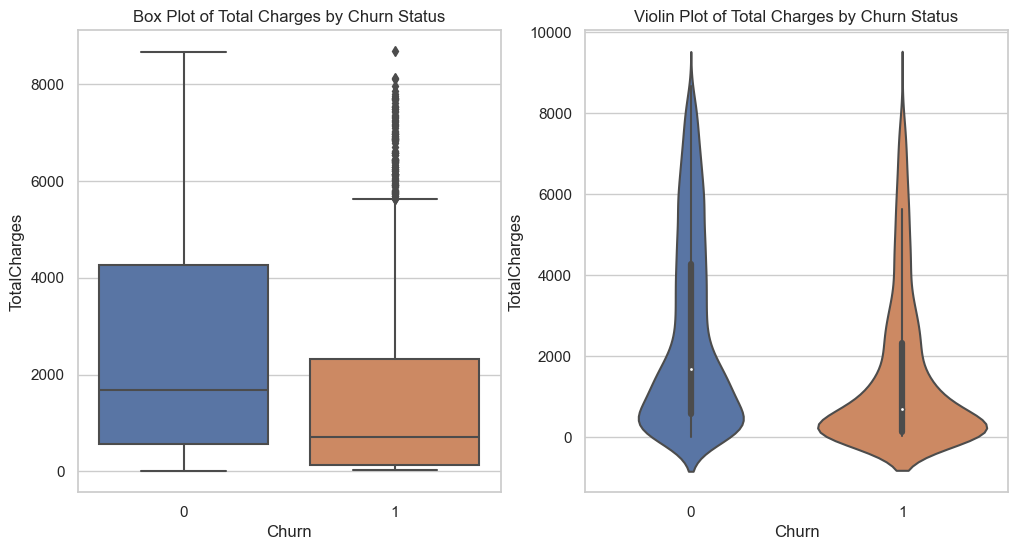

In [22]:
# Configurando o estilo
sns.set(style="whitegrid")

# Criando figuras para MonthlyCharges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=customer_churn_data)
plt.title('Box Plot of Monthly Charges by Churn Status')

plt.subplot(1, 2, 2)
sns.violinplot(x='Churn', y='MonthlyCharges', data=customer_churn_data)
plt.title('Violin Plot of Monthly Charges by Churn Status')

# Exibindo o plot
plt.show()

# Criando figuras para TotalCharges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='TotalCharges', data=customer_churn_data)
plt.title('Box Plot of Total Charges by Churn Status')

plt.subplot(1, 2, 2)
sns.violinplot(x='Churn', y='TotalCharges', data=customer_churn_data)
plt.title('Violin Plot of Total Charges by Churn Status')

# Exibindo o plot
plt.show()

##### Conclusões da análise de churn

- Clientes que cancelam (churn) parecem estar associados a cobranças mensais mais altas. Isso poderia indicar que preços mais altos podem ser um fator que contribui para o cancelamento.

- Em contraste, TotalCharges mais baixos para clientes que cancelam podem indicar que o churn é mais provável entre clientes novos ou aqueles que não utilizaram o serviço por um longo período.

- Para retenção de clientes, pode valer a pena investigar estratégias de preços, especialmente em torno da precificação mensal, e explorar se existe um ponto de preço que é mais sensível ao churn.

## Pré-processamento de dados

Aqui iremos continuar com o pré-processamento de dados necessários, como substituição das variáveis binárias, para assim seguirmos na etapa de modelagem futuramente, afim de utilizarmos features significativas na construção do modelo preditivo.

Lembrando que nós já:
1. Lidamos com valores nulos e imputamos o necessário
2. Encodamos a variável churn para análises previamente

**Agora iremos**

- continuar o encoding para variáveis binárias
- Após esta etapa, continuaremos no notebook 2.0-features_modeling

In [23]:
customer_churn_data['gender'] = customer_churn_data['gender'].map({'Male': 0, 'Female': 1})
customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,0
1,8984-HPEMB,1,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,0
2,5989-AXPUC,1,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,0
3,5734-EJKXG,1,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,0
4,8199-ZLLSA,0,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,1,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,0
7039,9945-PSVIP,1,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,0
7040,0827-ITJPH,0,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,0
7041,9764-REAFF,1,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,0


In [ ]:
customer_churn_data.drop(columns=['customerID'], inplace=True)

In [24]:
binary_columns = ['Partner', 'Dependents',]

for column in binary_columns:
    customer_churn_data[column] = customer_churn_data[column].map({'No': 0, 'Yes': 1})

customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,1,0,1,1,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),118.75,8672.45,0
1,8984-HPEMB,1,0,0,0,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Electronic check,118.65,8477.60,0
2,5989-AXPUC,1,0,1,0,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,0,Mailed check,118.60,7990.05,0
3,5734-EJKXG,1,0,0,0,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,1,Electronic check,118.60,7365.70,0
4,8199-ZLLSA,0,0,0,0,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),118.35,7804.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,1,0,0,0,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,18.70,1005.70,0
7039,9945-PSVIP,1,0,1,1,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Mailed check,18.70,383.65,0
7040,0827-ITJPH,0,0,0,0,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Credit card (automatic),18.55,689.00,0
7041,9764-REAFF,1,0,1,0,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),18.40,1057.85,0


In [25]:
pd.DataFrame.to_csv(customer_churn_data, '../data/processed/customer_churn_processed.csv', index=False)

## Conclusões Gerais

- **Cobranças Mensais (MonthlyCharges):** 
  Observamos que clientes com churn apresentam cobranças mensais mais altas, indicando que custos maiores podem levar ao cancelamento dos serviços.

- **Cobranças Totais (TotalCharges):**
  Clientes que cancelaram tendem a ter um total acumulado de cobranças menor, sugerindo que o churn ocorre mais frequentemente entre clientes mais novos ou com menor utilização dos serviços.

- **Tenure:** 
  A tenure mais curta está associada a uma probabilidade maior de churn, reforçando a importância de estratégias de engajamento focadas nos primeiros estágios da jornada do cliente.

- **Análise de Serviços:**
  Serviços adicionais como segurança online, backup online, proteção de dispositivo e suporte técnico mostram diferenças significativas nas taxas de churn. A oferta destes serviços parece influenciar positivamente a retenção de clientes.

- **Estratégias de Negócios:**
  Deve-se avaliar a precificação e o pacote de serviços oferecidos, buscando equilibrar receita e satisfação do cliente para diminuir o churn.

- **Recomendações:**
  Implementar programas de fidelização e revisar a estrutura de preços, especialmente para serviços adicionais que apresentam impacto na retenção de clientes. Estimular contratos de longo prazo e promover o uso de serviços complementares podem ser eficazes para reduzir o churn.

